    Assignment 2 - Abalone

In [1]:
from matplotlib import pyplot
%matplotlib inline
import pandas as pd   # Import the pandas module (this also imports matplotlib)
import seaborn as sns # Override the default matplotlib options to make our plots look nice
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [2]:
path_to_csv_file = "data/abalone.csv"
names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

In [3]:
#df = pd.read_csv(path_to_csv_file, index_col=False)
df = pd.read_csv(path_to_csv_file,skiprows=1, names=names)

In [4]:
df.shape

(4177, 9)

In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4176.000000,4177.000000,4177.000000,4177.000000,4176.000000
mean,0.523992,0.407881,0.139516,0.828419,0.359367,0.180594,0.238831,9.930795
std,0.120093,0.099240,0.041827,0.491041,0.221963,0.109614,0.139203,3.228948
min,0.075000,0.055000,0.000000,-0.738000,0.001000,0.000500,0.001500,-1.000000
25%,0.450000,0.350000,0.115000,0.441375,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [7]:
df = df.drop(df.index[[1257,3996,3291,1858,3505,3800,2051,335,112]])
#shuffle data
df = df.sample(frac=1).reset_index(drop=True)

In [8]:
# for more complicated cases use sklearn.feature_extraction.DictVectorizer
#for label in "MFI":
#    data[label] = data["sex"] == label
#del data["sex"]
mapping = dict(zip(["I", "F", "M"], [-1, 0, 1]))
df.replace({"Sex": mapping}, inplace=True)
#double check there is no NA data and drop if exists
df = df.dropna()

In [9]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-1,0.375,0.275,0.090,0.2180,0.0930,0.0405,0.0755,6.0
1,-1,0.440,0.330,0.135,0.5220,0.1700,0.0905,0.1950,16.0
2,1,0.770,0.605,0.175,2.0505,0.8005,0.5260,0.3550,11.0
3,0,0.600,0.460,0.150,1.2350,0.6025,0.2740,0.2900,8.0
4,-1,0.365,0.270,0.075,0.2215,0.0950,0.0445,0.0700,6.0


coeffient here -------------------->
[[  4.10656750e-06   1.06327822e-04   1.41723549e-04   3.17425758e-04
    1.12182217e-04  -2.87639079e-04  -1.57764805e-04   9.43591839e-05
    9.99985675e-01]]
-4.95888256704
Accuracy: -4.959 (0.575)


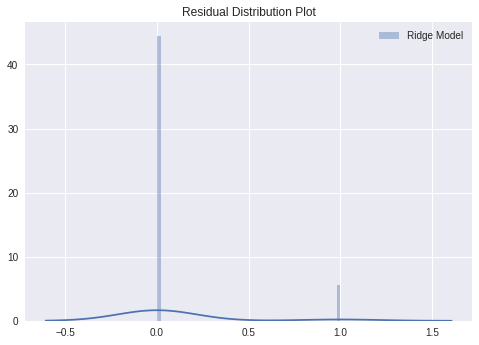

NameError: name 'linear_model' is not defined

In [15]:
x_axis = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
y_axis = ['Rings']

array = df.values
#X = array[:,0:8] or X = array[:,0:7] ??? not sure yet!!
X = array[:,0:8]
Y = array[:,8]


num_folds = 10

kfold = KFold(n_splits=10, random_state=7)

model = Ridge(alpha=0.3,fit_intercept=False)

model.fit(df[x_axis],df[y_axis])

print('coeffient here -------------------->')
print(model.coef_)

scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())
print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())

sns.distplot(model.coef_, label='Ridge Model')
pyplot.title('Residual Distribution Plot')
pyplot.legend()
pyplot.show()